CLIMATE ANALYSIS AND EXPLORATION

In [1]:
#Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [2]:
#Create engine 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#Declare Base using automap_base()
Base = automap_base()

##############
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [3]:
 # Save references to each table
 Measurement =  Base.classes.measurement
 Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
#Determine what attributes are in the class
###Use inspector to get 'measurement' attributes, 'station' attributes
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
#Load Measurement and Station into panda dataframes
stmt = session.query(Measurement).statement
Measurement_df = pd.read_sql_query(stmt, session.bind)
print("Measurement_df")
print(Measurement_df.head())

stmt = session.query(Station).statement
Station_df = pd.read_sql_query(stmt, session.bind)
print("Station_df")
print(Station_df.head())
Measurement_df.dtypes


Measurement_df
   id      station        date  prcp  tobs
0   1  USC00519397  2010-01-01  0.08  65.0
1   2  USC00519397  2010-01-02  0.00  63.0
2   3  USC00519397  2010-01-03  0.00  74.0
3   4  USC00519397  2010-01-04  0.00  76.0
4   5  USC00519397  2010-01-06   NaN  73.0
Station_df
   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1   2  USC00513117                    KANEOHE 838.1, HI US   21.4234   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3   4  USC00517948                       PEARL CITY, HI US   21.3934   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

   longitude  elevation  
0  -157.8168        3.0  
1  -157.8015       14.6  
2  -157.8374        7.0  
3  -157.9751       11.9  
4  -158.0111      306.6  


id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

Precipitation Analysis

In [59]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results

# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.

conn=engine.connect()
Measurement_yr_df = pd.read_sql("SELECT * FROM Measurement" , conn)
Measurement_yr_df

##### Convert to column 'date' from format 'object' to 'datetime' 
Measurement_yr_df["date"]=pd.to_datetime(Measurement_yr_df["date"],format="%Y/%m/%d")
#Measurement_yr_df.info()  #Check dtype has converted from 'object' to 'datetime'
print(Measurement_yr_df.info())

##### Calculate the date 1 year ago from the last data point in the database
#Check most recent date that data provides
Measurement_yr_df["date"].max()   #It is 2017-08-23

older_date = "2016-08-23"
latest_date = "2017-08-23"

Measurement_yr_df = Measurement_yr_df.loc[Measurement_yr_df["date"].between(older_date, latest_date)]
Measurement_yr_df

# Perform a query to retrieve the data and precipitation scores
########I didn't do this via query for this step####
Measurement_yr_df

# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_yr_df = Measurement_yr_df.set_index("date")
Measurement_yr_df

# Sort the dataframe by date
Measurement_yr_df = Measurement_yr_df.sort_values(by="date")
Measurement_yr_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       19550 non-null  int64         
 1   station  19550 non-null  object        
 2   date     19550 non-null  datetime64[ns]
 3   prcp     18103 non-null  float64       
 4   tobs     19550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 763.8+ KB
None


,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,5091,USC00513117,0.15,76.0
...,...,...,...,...
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-23,7635,USC00514830,0.00,82.0
2017-08-23,2724,USC00519397,0.00,81.0


Text(0, 0.5, 'Precipitation (inches)')

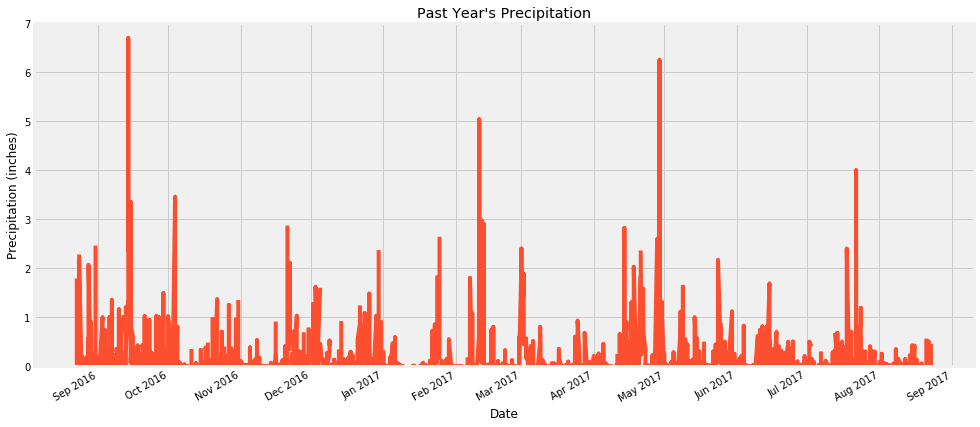

In [91]:
# Use Pandas Plotting with Matplotlib to plot the data
# Measurement_yr_df.plot(kind="bar", figsize=(7,4), y="prcp", linewidth=10, rot=90, color="plum", legend=False);

# plt.title("Past Year's Precipitation")
# plt.xlabel("date")
# plt.ylabel("Precipitation (inches)")

# plt.locator_params(axis='x', nbins=15)
# plt.ylim(0,4)


##############
#plot data

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,7))
Measurement_yr_df.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.ylim(0,7)
ax.get_legend().remove()

#Headings
plt.title("Past Year's Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

In [8]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary=Measurement_yr_df["prcp"].describe()
prcp_summary

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [25]:
Measurement_df['station'].unique()
Measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


Stations Analysis

In [52]:
# Design a query to show the total number of stations which are available in this dataset? ('Measurements' dataset)

#Dependencies
from sqlalchemy import distinct

# Count distinct "name" values
num_stations=session.query(func.count(distinct(Measurement.station))).first()
print(f"Total Number of Stations: {num_stations}")

# List the unique stations
records = engine.execute("SELECT DISTINCT (station) FROM Measurement")
print("\nDistinct Stations")
for record in records:
    print(f"\n{record}")


Total Number of Stations: (9,)

Distinct Stations

('USC00519397',)

('USC00513117',)

('USC00514830',)

('USC00517948',)

('USC00518838',)

('USC00519523',)

('USC00519281',)

('USC00511918',)

('USC00516128',)


In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Return count of "station id" grouped by "station"
station_id_group=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)#.\
   #     order_by(desc("station_records"))

for record in station_id_group:
    print(f"\n{record}")




('USC00511918', 1979)

('USC00513117', 2709)

('USC00514830', 2202)

('USC00516128', 2612)

('USC00517948', 1372)

('USC00518838', 511)

('USC00519281', 2772)

('USC00519397', 2724)

('USC00519523', 2669)


In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram